In [1]:
!git clone https://github.com/purvi1239/FakeDetectionModel.git


Cloning into 'FakeDetectionModel'...
remote: Enumerating objects: 1481, done.
remote: Counting objects: 100% (1481/1481), done.
remote: Compressing objects: 100% (1477/1477), done.
remote: Total 1481 (delta 1), reused 1480 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (1481/1481), 22.83 MiB | 20.31 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
pip install tensorflow scikit-learn pandas numpy pillow opencv-python


In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics.pairwise import cosine_similarity

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [14]:
csv_path = "/content/FakeDetectionModel/dataset/LogoDatabase.csv"
images_folder = "Logos"


df = pd.read_csv(csv_path)
print(df.head())


              logoName                                     fileName
0              YouTube                             youtube-logo.png
1  YouTube icon vector                     YouTube-icon-400x400.png
2              YouTube           youtube-logo-preview-1-400x400.png
3         FC Barcelona                    new-fc-barcelona-logo.png
4              YouTube  youtube-eps-version-vector-logo-400x400.png


In [23]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


In [16]:
def extract_features(image_path):
    img = preprocess_image(image_path)
    features = model.predict(img, verbose=0)
    return features


In [17]:
logo_features = []
logo_labels = []

for _, row in df.iterrows():
    img_path = os.path.join(images_folder, row["fileName"])

    if os.path.exists(img_path):
        features = extract_features(img_path)
        logo_features.append(features)
        logo_labels.append(row["logoName"])


In [19]:
for _, row in df.iterrows():
    img_path = os.path.join(images_folder, row["fileName"])
    print("Checking:", img_path)

    if os.path.exists(img_path):
        features = extract_features(img_path)
        logo_features.append(features)
        logo_labels.append(row["logoName"])


Checking: Logos/youtube-logo.png
Checking: Logos/YouTube-icon-400x400.png
Checking: Logos/youtube-logo-preview-1-400x400.png
Checking: Logos/new-fc-barcelona-logo.png
Checking: Logos/youtube-eps-version-vector-logo-400x400.png
Checking: Logos/google-trends-logo.png
Checking: Logos/hrc-logo-preview-400x400.png
Checking: Logos/xiaomi-logo-vector-download.jpg
Checking: Logos/Bamboo-Airways-logo-vector.png
Checking: Logos/youtube-logo-vector-400x400.png
Checking: Logos/philipp-plein-logo-01.png
Checking: Logos/juventus-fc-logo-400x400.png
Checking: Logos/facebook-icon-preview-1-400x400.png
Checking: Logos/uber-logo-vector.png
Checking: Logos/paypal-logo-svg.png
Checking: Logos/dumbo-vector-400x400.png
Checking: Logos/fsc-logo-vector-download-400x400.jpg
Checking: Logos/dragon-ball-z-eps-vector-logo-400x400.png
Checking: Logos/instagram-logo-vector-download-400x400.jpg
Checking: Logos/disturbed-vector-logo-400x400.png
Checking: Logos/youtube-button-vector-400x400.png
Checking: Logos/adidas-

In [20]:
print(df.columns)


Index(['logoName', 'fileName'], dtype='object')


In [26]:
logo_features = []
logo_labels = []

for _, row in df.iterrows():
    img_path = os.path.join(images_folder, row["fileName"])

    if os.path.exists(img_path):
        features = extract_features(img_path)
        logo_features.append(features)
        logo_labels.append(row["logoName"])

Error: No features were extracted even after correcting the path. Check the 'Logos' directory content.


In [29]:
def extract_features(image_path):
    img = preprocess_image(image_path)
    features = model.predict(img)
    return features


In [36]:
def image_similarity(img1, img2):
    feat1 = extract_features(img1)
    feat2 = extract_features(img2)

    similarity = cosine_similarity(feat1, feat2)
    return similarity[0][0] * 100


In [41]:
import os

# 1. Update the path to point to the 'Logos' folder seen in your sidebar
logos_folder_path = "/content/FakeDetectionModel/dataset/Logos/"
customer_image = "/content/Screenshot 2026-01-24 at 3.42.54 PM.png" # Your input image

# 2. Ask for the brand keyword
search_term = input("Enter brand name (ex: nike, adidas): ").lower().strip()

if not os.path.exists(logos_folder_path):
    print(f"Error: The folder '{logos_folder_path}' was not found.")
else:
    # 3. Get a list of ALL files in the Logos folder
    all_files = os.listdir(logos_folder_path)

    # 4. Find files where the filename contains the search term
    # This filters the list to find matches like "Adidas-logo.png" when you type "adidas"
    matches = [f for f in all_files if search_term in f.lower()]

    if not matches:
        print(f"No logo files found containing '{search_term}'.")
        print("Here are some examples of files in that folder:", all_files[:3])
    else:
        # Success: Pick the first matching file found
        best_match = matches[0]
        original_image_path = os.path.join(logos_folder_path, best_match)

        print(f"Found match: {best_match}")
        print(f"Full path: {original_image_path}")

        # --- PROCEED WITH COMPARISON ---
        # Now you can use 'original_image_path' in your similarity function
        # score = image_similarity(original_image_path, customer_image)
        # print(f"Score: {score}")

Enter brand name (ex: nike, adidas): nike
Found match: nike-eps-vector-logo-400x400.png
Full path: /content/FakeDetectionModel/dataset/Logos/nike-eps-vector-logo-400x400.png


In [47]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# 1. Load the pre-trained VGG16 model
# include_top=False removes the final classification layer (we only want features)
# pooling='avg' ensures the output is a simple list of numbers (vector), not a 3D box
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

print("✅ Model loaded successfully!")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
✅ Model loaded successfully!


Enter brand name (ex: nike, adidas): nike

--- MATCH FOUND ---
Reference Logo: nike-eps-vector-logo-400x400.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
Similarity Score: 34.11%


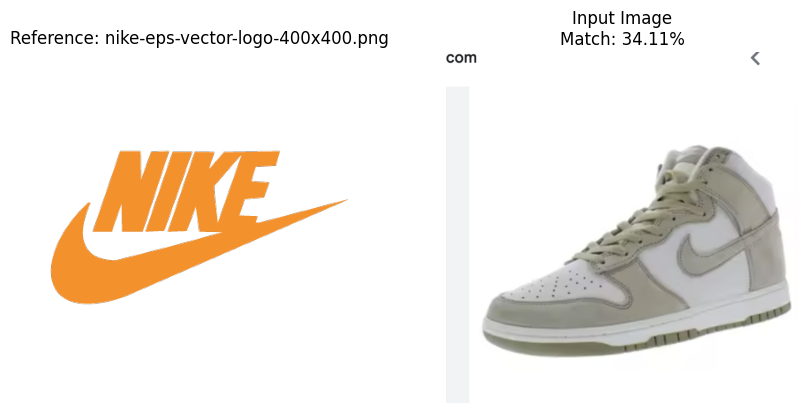

❌ Verdict: Likely Fake


In [49]:


# 1. Setup Paths
logos_folder_path = "/content/FakeDetectionModel/dataset/Logos/"
customer_image = "/content/Screenshot 2026-01-24 at 3.42.54 PM.png" # Your input

# 2. Get User Input
search_term = input("Enter brand name (ex: nike, adidas): ").lower().strip()

# 3. Search Logic
if not os.path.exists(logos_folder_path):
    print(f"Error: The folder '{logos_folder_path}' was not found.")
else:
    all_files = os.listdir(logos_folder_path)
    matches = [f for f in all_files if search_term in f.lower()]

    if not matches:
        print(f"No logo files found containing '{search_term}'.")
        print("Available files:", all_files[:5])
    else:
        # --- SUCCESS: FOUND A MATCH ---
        best_match = matches[0]
        original_image_path = os.path.join(logos_folder_path, best_match)

        print(f"\n--- MATCH FOUND ---")
        print(f"Reference Logo: {best_match}")

        # 4. Compare Images (The AI Part)
        # Note: We assume 'extract_features' is defined in a previous cell.
        # If this fails, re-run the cell where you defined the model.
        features_original = extract_features(original_image_path)
        features_customer = extract_features(customer_image)

        similarity_score = cosine_similarity(features_original, features_customer)[0][0]
        percentage = similarity_score * 100

        # 5. Visualize Results
        print(f"Similarity Score: {percentage:.2f}%")

        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        # Show Reference
        img_original = mpimg.imread(original_image_path)
        ax[0].imshow(img_original)
        ax[0].set_title(f"Reference: {best_match}")
        ax[0].axis('off')

        # Show Input
        img_customer = mpimg.imread(customer_image)
        ax[1].imshow(img_customer)
        ax[1].set_title(f"Input Image\nMatch: {percentage:.2f}%")
        ax[1].axis('off')

        plt.show()

        # 6. Final Verdict
        if percentage > 80:
            print("✅ Verdict: Likely Authentic")
        elif percentage > 60:
            print("⚠️ Verdict: Suspicious / Low Confidence")
        else:
            print("❌ Verdict: Likely Fake")